In [1]:
!pip install --upgrade fastai

     |████████████████████████████████| 194kB 7.9MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastai.vision.all import *

In [3]:
torch.cuda.is_available()

True

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
path = untar_data(URLs.PETS)
Path.BASE_PATH = path

In [6]:
path.ls()

(#2) [Path('images'),Path('annotations')]

In [7]:
(path/'images').ls()

(#7393) [Path('images/english_cocker_spaniel_141.jpg'),Path('images/British_Shorthair_3.jpg'),Path('images/Russian_Blue_118.jpg'),Path('images/Egyptian_Mau_178.jpg'),Path('images/miniature_pinscher_107.jpg'),Path('images/american_pit_bull_terrier_138.jpg'),Path('images/pug_151.jpg'),Path('images/Bengal_172.jpg'),Path('images/basset_hound_44.jpg'),Path('images/beagle_170.jpg')...]

In [8]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

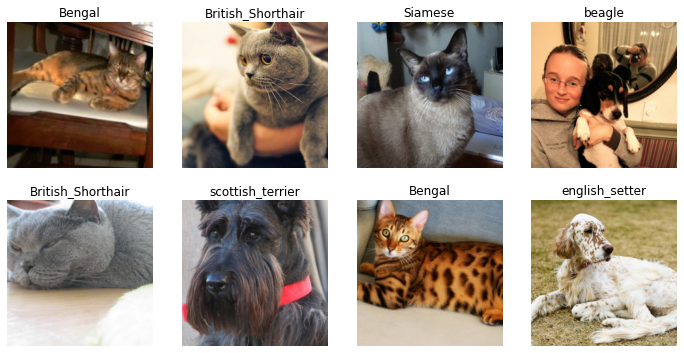

In [9]:
dls = pets.dataloaders(path/'images', bs=128)
dls.train.show_batch(max_n=8, nrows=2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.00363078061491251)

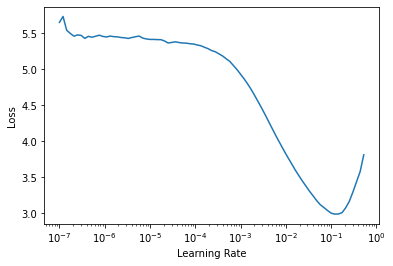

In [10]:
learn = cnn_learner(dls, resnet18, pretrained=True, metrics=accuracy)
learn.lr_find()

In [11]:
learn.fine_tune(5, lr=4e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.268815,0.428319,0.861299,01:03


epoch,train_loss,valid_loss,accuracy,time
0,0.593489,0.314822,0.894452,01:04
1,0.474989,0.302601,0.900541,01:04
2,0.351464,0.249584,0.918133,01:04
3,0.270111,0.234647,0.924899,01:04
4,0.216200,0.232807,0.924899,01:03


In [12]:
# learn.export(fname='mnist_resnet18_2.pkl')